<a href="https://colab.research.google.com/github/KiranVarghese25/ml_labfiles/blob/main/Lab7_2348525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree

In [77]:
#importing the dataset
data=pd.read_csv('/content/employee_data (1) 2.csv')
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [78]:
data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [79]:
#chechking for null values
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [80]:
data=data.drop(['recently_promoted','filed_complaint'],axis=1)

In [82]:
data=data.dropna()

In [83]:
data.shape

(12075, 8)

In [84]:
#Finding the categorical variables from the table
def check_categorical_columns(df):
    categorical_columns = []
    for column in df.columns:
        if df[column].dtype == 'object':
            categorical_columns.append(column)
    return categorical_columns

cat_col=check_categorical_columns(data)
cat_col

['department', 'salary', 'status']

In [86]:
le=LabelEncoder()
for column in cat_col:
  data[column]=le.fit_transform(data[column])
data.head()

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
0,221,2,0.932868,4,1,0.829896,1,5.0
2,184,9,0.788830,3,2,0.834988,0,3.0
3,206,9,0.575688,4,1,0.424764,0,2.0
4,249,9,0.845217,3,1,0.779043,0,3.0
5,140,9,0.589097,4,2,0.660020,0,4.0


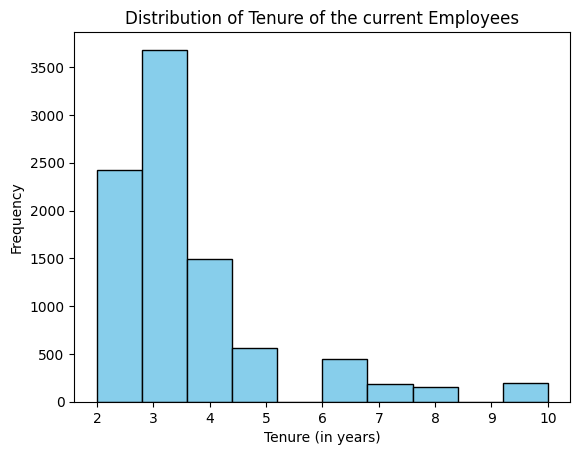

In [87]:
#filtering the data based of status
curr_emp=data[data['status'] == 0]

#plotting the graph
plt.hist(curr_emp['tenure'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Tenure (in years)')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure of the current Employees')
plt.show()

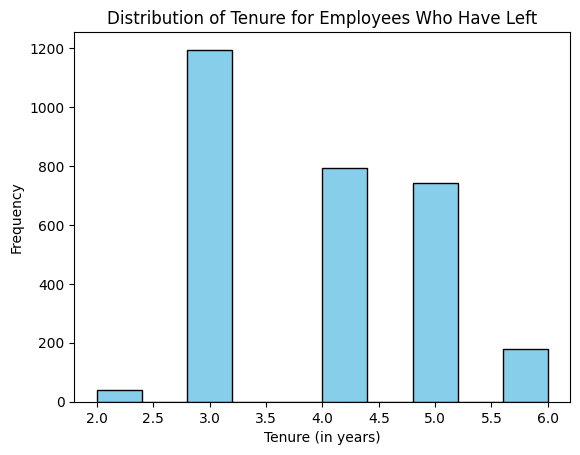

In [88]:
#filtering the data based of status
ex_emp=data[data['status'] == 1]

#plotting the graph
plt.hist(ex_emp['tenure'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Tenure (in years)')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure for Employees Who Have Left')
plt.show()


Text(0.5, 1.0, 'Distribution of Job Satisfaction Scores by Employee Status')

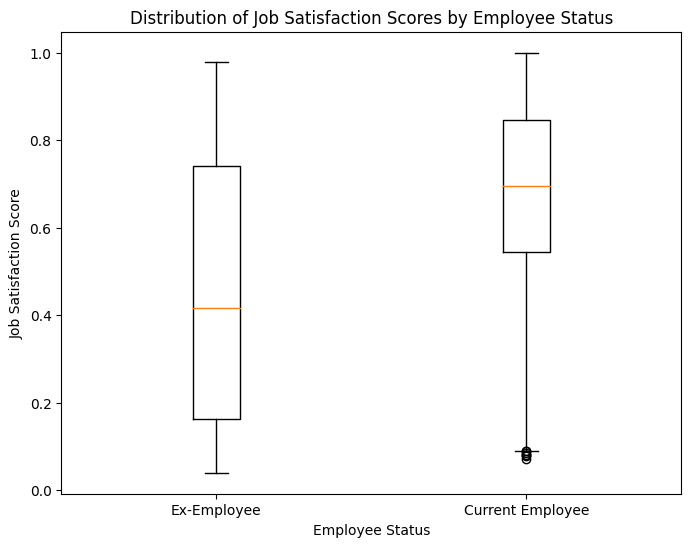

In [89]:
#boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([ex_emp['satisfaction'], curr_emp['satisfaction']], labels=['Ex-Employee', 'Current Employee'])
plt.xlabel('Employee Status')
plt.ylabel('Job Satisfaction Score')
plt.title('Distribution of Job Satisfaction Scores by Employee Status')

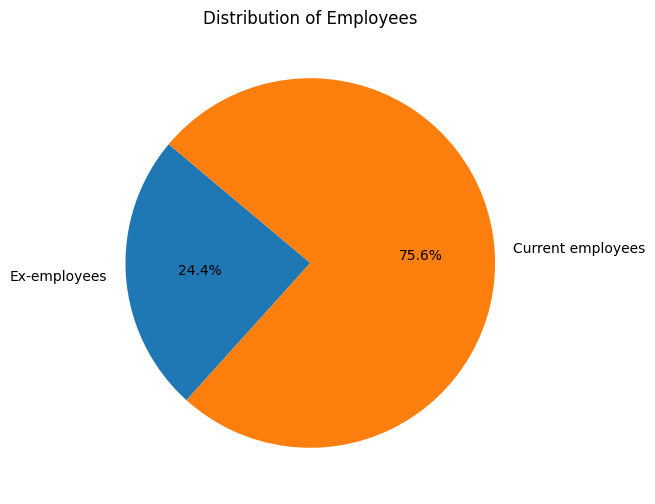

In [90]:
ex_emp_count=len(ex_emp)
curr_emp_count=len(curr_emp)
categories = ['Ex-employees', 'Current employees']
counts = [ex_emp_count, curr_emp_count]

#plotting the graph
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees')
plt.show()

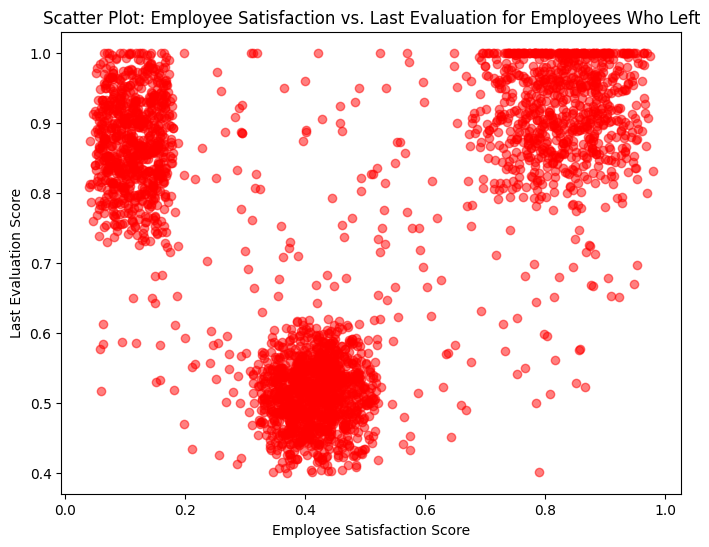

In [91]:
#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(ex_emp['satisfaction'], ex_emp['last_evaluation'], color='red', alpha=0.5)
plt.xlabel('Employee Satisfaction Score')
plt.ylabel('Last Evaluation Score')
plt.title('Scatter Plot: Employee Satisfaction vs. Last Evaluation for Employees Who Left')
plt.show()

In [94]:
#Splitting the dataset
X = data.drop(['status'],axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
D_tree_clf=DecisionTreeClassifier()
D_tree_clf.fit(X_train,y_train)
y_pred = D_tree_clf.predict(X_test)

In [104]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9590062111801242


In [106]:
#gini
D_Tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
D_Tree_gini.fit(X_train, y_train)
y_pred_gini = D_Tree_gini.predict(X_test)

accuracy_gini = metrics.accuracy_score(y_test, y_pred_gini)
print(f'Accuracy (Gini impurity): {accuracy_gini:.2f}')



Accuracy (Gini impurity): 0.96


In [107]:
#entropy
D_Tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
D_Tree_entropy.fit(X_train, y_train)
y_pred_entropy = D_Tree_entropy.predict(X_test)

accuracy_entropy =metrics.accuracy_score(y_test, y_pred_entropy)
print(f'Accuracy (Entropy): {accuracy_entropy:.2f}')

Accuracy (Entropy): 0.96


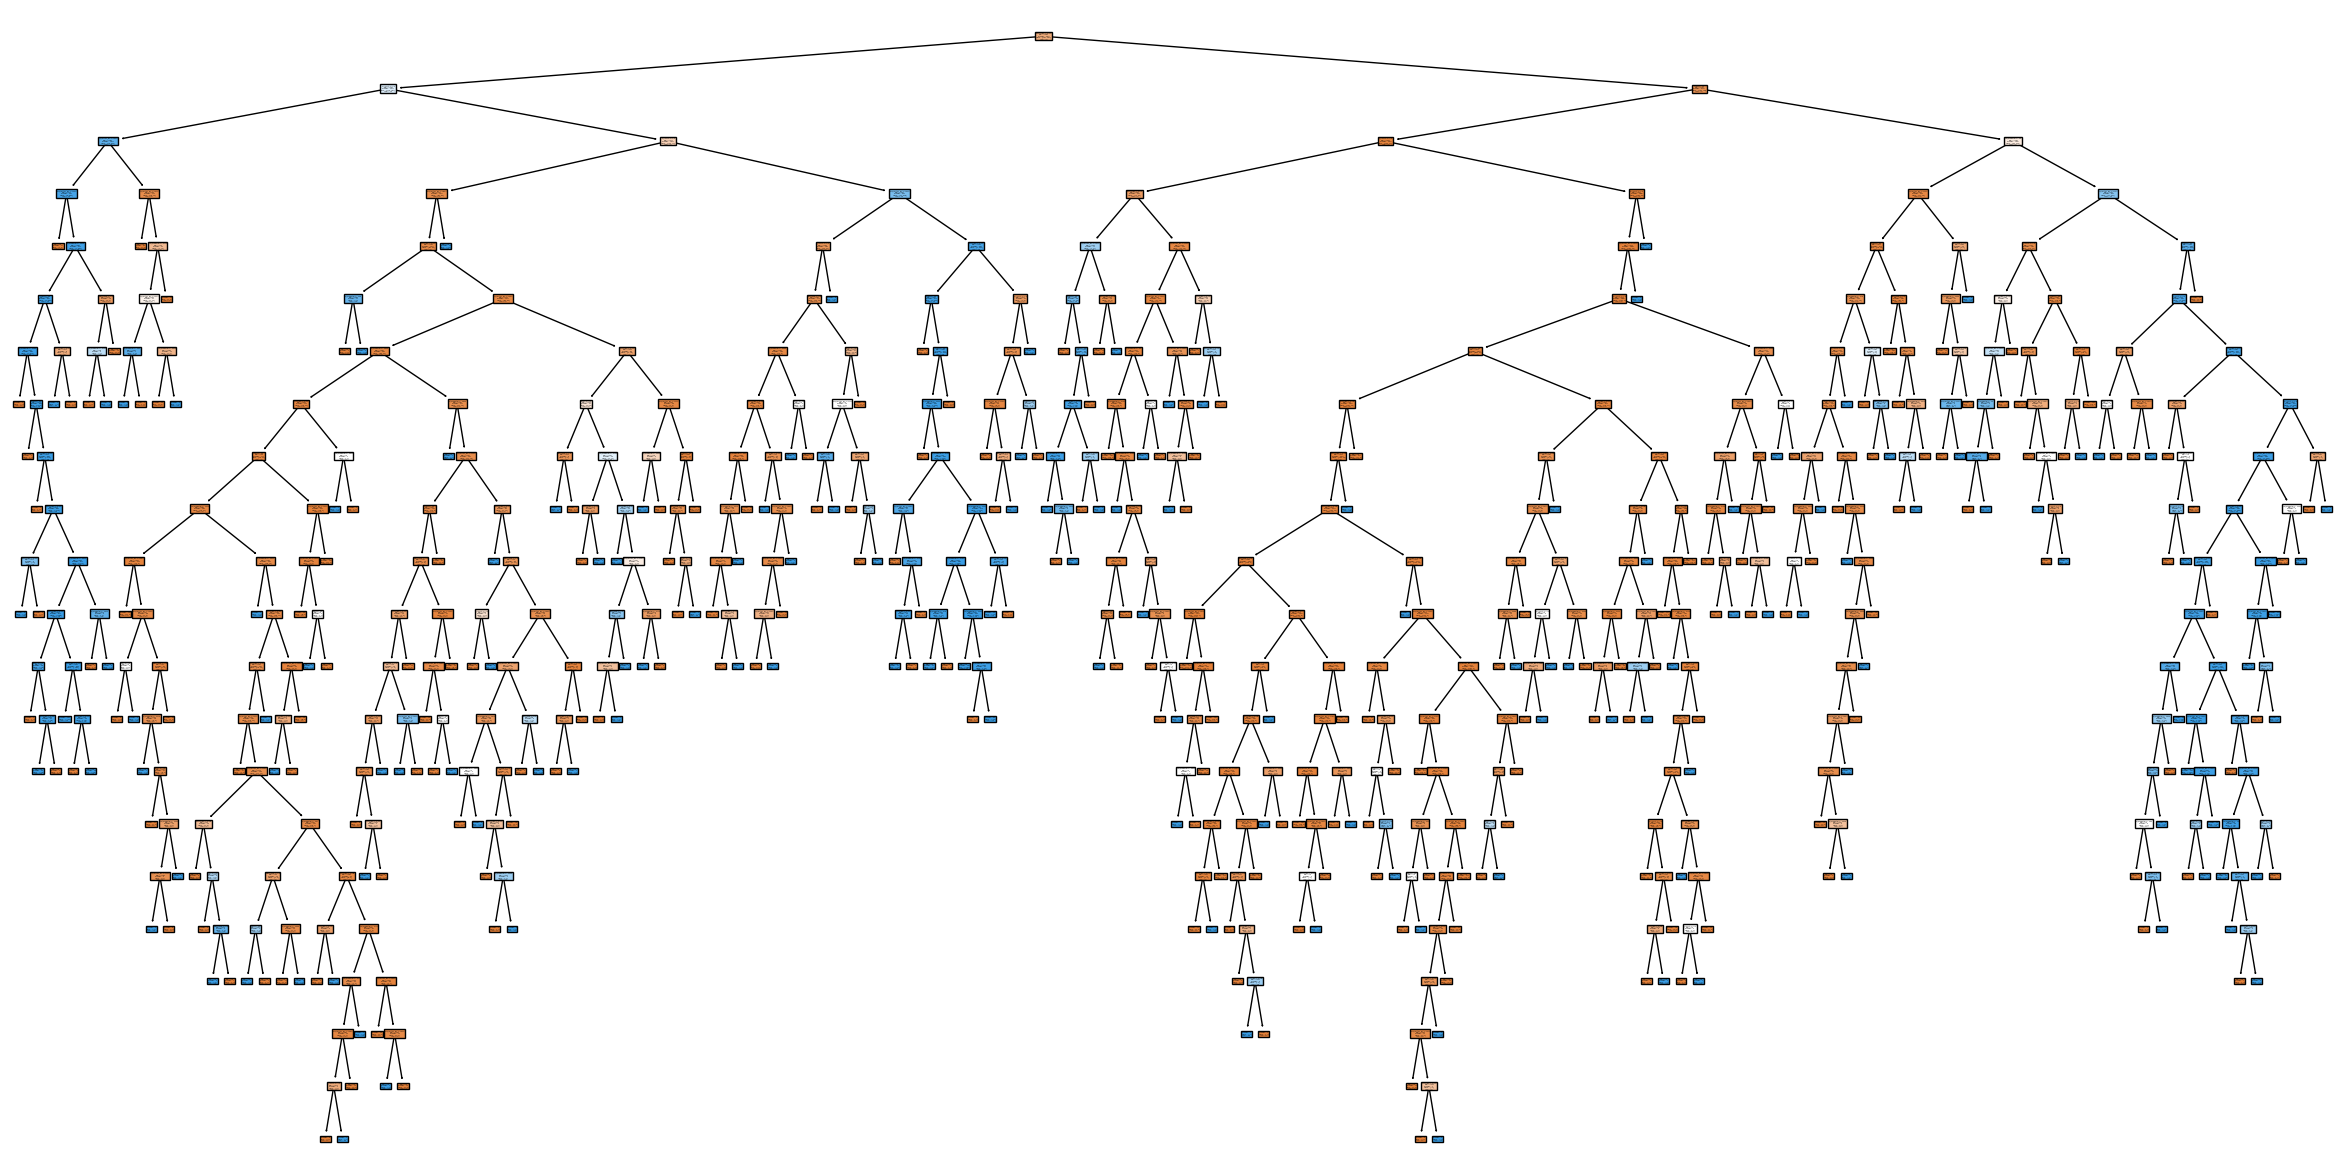

In [116]:
class_names = ['No', 'Yes']
feature_names=data.drop(['status'],axis=1).columns.tolist()

plt.figure(figsize=(30, 15))
plot_tree(D_tree_clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()








**Post Pruning**

In [144]:
#Pruning-minimum leaf size
pruned_tree_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
pruned_tree_min_samples_leaf.fit(X_train, y_train)
y_pred= pruned_tree_min_samples_leaf.predict(X_test)

In [145]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


In [148]:
#Pruning-maximum depth
pruned_tree_max_depth = DecisionTreeClassifier(max_depth=5, random_state=42)
pruned_tree_max_depth.fit(X_train, y_train)
y_pred = pruned_tree_max_depth.predict(X_test)

In [149]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96
